# Classification

## K-Nearest Neighbor

In [118]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris.target # or iris_df['target'] = iris['target']
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [6]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
k = 1

# distance
knn_model = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski')
knn_model.fit(X = iris['data'], y = iris['target'])
knn_model.predict(X=[[5.1,3.5,1.4,0.2],[6.7,3.0,5.2,2.3]])

array([0, 2])

In [121]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
k = 1

# distance
knn_model = KNeighborsClassifier(n_neighbors=k, metric = 'mahalanobis', metric_params={'V': iris_df.iloc[:,:-1].corr()})
knn_model.fit(X = iris['data'], y = iris['target'])
knn_model.predict(X=[[5.1,3.5,1.4,0.2],[6.7,3.0,5.2,2.3]])

array([0, 2])

In [9]:
from sklearn.neighbors import KNeighborsClassifier
k = 1

# distance
knn_model = KNeighborsClassifier(n_neighbors=k, metric = 'hamming')
knn_model.fit(X = iris['data'], y = iris['target'])
knn_model.predict(X=[[5.1,3.5,1.4,0.2],[6.7,3.0,5.2,2.3]])

array([0, 2])

In [10]:
from sklearn.neighbors import KNeighborsClassifier
k = 1

# distance
knn_model = KNeighborsClassifier(n_neighbors=k, metric = 'cosine')
knn_model.fit(X = iris['data'], y = iris['target'])
knn_model.predict(X=[[5.1,3.5,1.4,0.2],[6.7,3.0,5.2,2.3]])

array([0, 2])

In [11]:
from sklearn.neighbors import KNeighborsClassifier
k = 1

# distance
knn_model = KNeighborsClassifier(n_neighbors=k, metric = 'jaccard')
knn_model.fit(X = iris['data'], y = iris['target'])
knn_model.predict(X=[[5.1,3.5,1.4,0.2],[6.7,3.0,5.2,2.3]])

array([0, 0])

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import entropy
k = 1

# distance
knn_model = KNeighborsClassifier(n_neighbors=k, metric = entropy)
knn_model.fit(X = iris['data'], y = iris['target'])
knn_model.predict(X=[[5.1,3.5,1.4,0.2],[6.7,3.0,5.2,2.3]])

array([0, 2])

### Cross-Validation to tuning k

In [13]:
from sklearn.model_selection import GridSearchCV

n = 5
k = range(1,10)
metric = ['hamming','minkowski', 'jaccard']
param_grid = {
    "n_neighbors":k,
    "metric": metric
}
knn_model = KNeighborsClassifier()
estimator = GridSearchCV(estimator=knn_model,param_grid=param_grid,cv = n) # default is 5
estimator.fit(X=iris['data'],y = iris['target'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['hamming', 'minkowski', 'jaccard'],
                         'n_neighbors': range(1, 10)})

In [14]:
estimator.best_params_

{'metric': 'minkowski', 'n_neighbors': 6}

### Bayes and 1NN Error

In [27]:
from sklearn.model_selection import train_test_split
car_df = pd.read_csv('./Car.csv')
Y = car_df['car_acceptability']
X = car_df.iloc[:,:-1]
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3)

In [28]:
car_df['car_acceptability'].unique()

array([1, 0], dtype=int64)

In [29]:
from sklearn.naive_bayes import BernoulliNB
model_knn = KNeighborsClassifier(n_neighbors=1)
model_GNB = BernoulliNB()

model_knn.fit(X = train_x, y = train_y)
model_GNB.fit(X = train_x, y = train_y)



BernoulliNB()

In [30]:
err_knn = 1 - model_knn.score(X = test_x, y = test_y)
err_GNB = 1 - model_GNB.score(X = test_x, y = test_y)
err_knn, err_GNB

(0.1579961464354528, 0.3044315992292871)

## Decision Tree Algorithm

### Preprocess

In [61]:
credit = pd.read_csv('./credit.csv')
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,skilled employee,2,none,yes,1
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,skilled employee,2,none,yes,2


In [49]:
# 因为这里数据很多字符型，所以要先进行数据预处理, 这里利用factorize() function生成数字化标签
credit_feature_label = {}
qualitative_feature_index = [0,2,3,5,6,8,9,11,13,14,16,18,19]
for column in credit.columns[qualitative_feature_index]:
    credit_quantite = credit[column].factorize()
    credit[column] = credit_quantite[0]
    credit_feature_label[column] = dict(zip(credit_quantite[1], range(len(credit_quantite[1]))))

In [52]:
credit_feature_label

{'checking_balance': {'< 0 DM': 0,
  '1 - 200 DM': 1,
  'unknown': 2,
  '> 200 DM': 3},
 'credit_history': {'critical': 0,
  'repaid': 1,
  'delayed': 2,
  'fully repaid': 3,
  'fully repaid this bank': 4},
 'purpose': {'radio/tv': 0,
  'education': 1,
  'furniture': 2,
  'car (new)': 3,
  'car (used)': 4,
  'business': 5,
  'domestic appliances': 6,
  'repairs': 7,
  'others': 8,
  'retraining': 9},
 'savings_balance': {'unknown': 0,
  '< 100 DM': 1,
  '501 - 1000 DM': 2,
  '> 1000 DM': 3,
  '101 - 500 DM': 4},
 'employment_length': {'> 7 yrs': 0,
  '1 - 4 yrs': 1,
  '4 - 7 yrs': 2,
  'unemployed': 3,
  '0 - 1 yrs': 4},
 'personal_status': {'single male': 0,
  'female': 1,
  'divorced male': 2,
  'married male': 3},
 'other_debtors': {'none': 0, 'guarantor': 1, 'co-applicant': 2},
 'property': {'real estate': 0,
  'building society savings': 1,
  'unknown/none': 2,
  'other': 3},
 'installment_plan': {'none': 0, 'bank': 1, 'stores': 2},
 'housing': {'own': 0, 'for free': 1, 'rent': 2}

In [62]:
# 第二个打标签的方法, 运行时记得重新读一次数据，因为上一个方法已经转化过了
from sklearn.preprocessing import LabelEncoder
qualitative_feature_index = [0,2,3,5,6,8,9,11,13,14,16,18,19]
credit_feature_label = {}
for column in credit.columns[qualitative_feature_index]:
    credit_label = LabelEncoder().fit(credit[column])
    credit[column] = credit_label.transform(credit[column])
    credit_feature_label[column] = dict(zip(credit_label.classes_, range(len(credit_label.classes_))))

In [63]:
credit_feature_label

{'checking_balance': {'1 - 200 DM': 0,
  '< 0 DM': 1,
  '> 200 DM': 2,
  'unknown': 3},
 'credit_history': {'critical': 0,
  'delayed': 1,
  'fully repaid': 2,
  'fully repaid this bank': 3,
  'repaid': 4},
 'purpose': {'business': 0,
  'car (new)': 1,
  'car (used)': 2,
  'domestic appliances': 3,
  'education': 4,
  'furniture': 5,
  'others': 6,
  'radio/tv': 7,
  'repairs': 8,
  'retraining': 9},
 'savings_balance': {'101 - 500 DM': 0,
  '501 - 1000 DM': 1,
  '< 100 DM': 2,
  '> 1000 DM': 3,
  'unknown': 4},
 'employment_length': {'0 - 1 yrs': 0,
  '1 - 4 yrs': 1,
  '4 - 7 yrs': 2,
  '> 7 yrs': 3,
  'unemployed': 4},
 'personal_status': {'divorced male': 0,
  'female': 1,
  'married male': 2,
  'single male': 3},
 'other_debtors': {'co-applicant': 0, 'guarantor': 1, 'none': 2},
 'property': {'building society savings': 0,
  'other': 1,
  'real estate': 2,
  'unknown/none': 3},
 'installment_plan': {'bank': 0, 'none': 1, 'stores': 2},
 'housing': {'for free': 0, 'own': 1, 'rent': 2}

### Train Model

In [67]:
# 分训练集和测试集
from sklearn import model_selection
X = credit.loc[:, 'checking_balance':'foreign_worker']
y = credit['default'] 
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [69]:
from sklearn.tree import DecisionTreeClassifier
#cart
credit_model_cart = DecisionTreeClassifier(criterion='gini')
credit_model_cart.fit(train_x, train_y)

#id3
credit_model_id3 = DecisionTreeClassifier(criterion='entropy')
credit_model_id3.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy')

### Tree Plot

[Text(0.5555235239852399, 0.9761904761904762, 'x[0] <= 1.5\ngini = 0.425\nsamples = 700\nvalue = [486, 214]'),
 Text(0.3412995848708487, 0.9285714285714286, 'x[1] <= 22.5\ngini = 0.494\nsamples = 378\nvalue = [210, 168]'),
 Text(0.12626845018450183, 0.8809523809523809, 'x[2] <= 1.5\ngini = 0.449\nsamples = 209\nvalue = [138, 71]'),
 Text(0.042435424354243544, 0.8333333333333334, 'x[9] <= 1.5\ngini = 0.259\nsamples = 59\nvalue = [50, 9]'),
 Text(0.014760147601476014, 0.7857142857142857, 'x[4] <= 1047.0\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.007380073800738007, 0.7380952380952381, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.02214022140221402, 0.7380952380952381, 'x[15] <= 2.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.014760147601476014, 0.6904761904761905, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.02952029520295203, 0.6904761904761905, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07011070110701106, 0.7857142857142857, 'x[2] <= 0.5\ngini = 

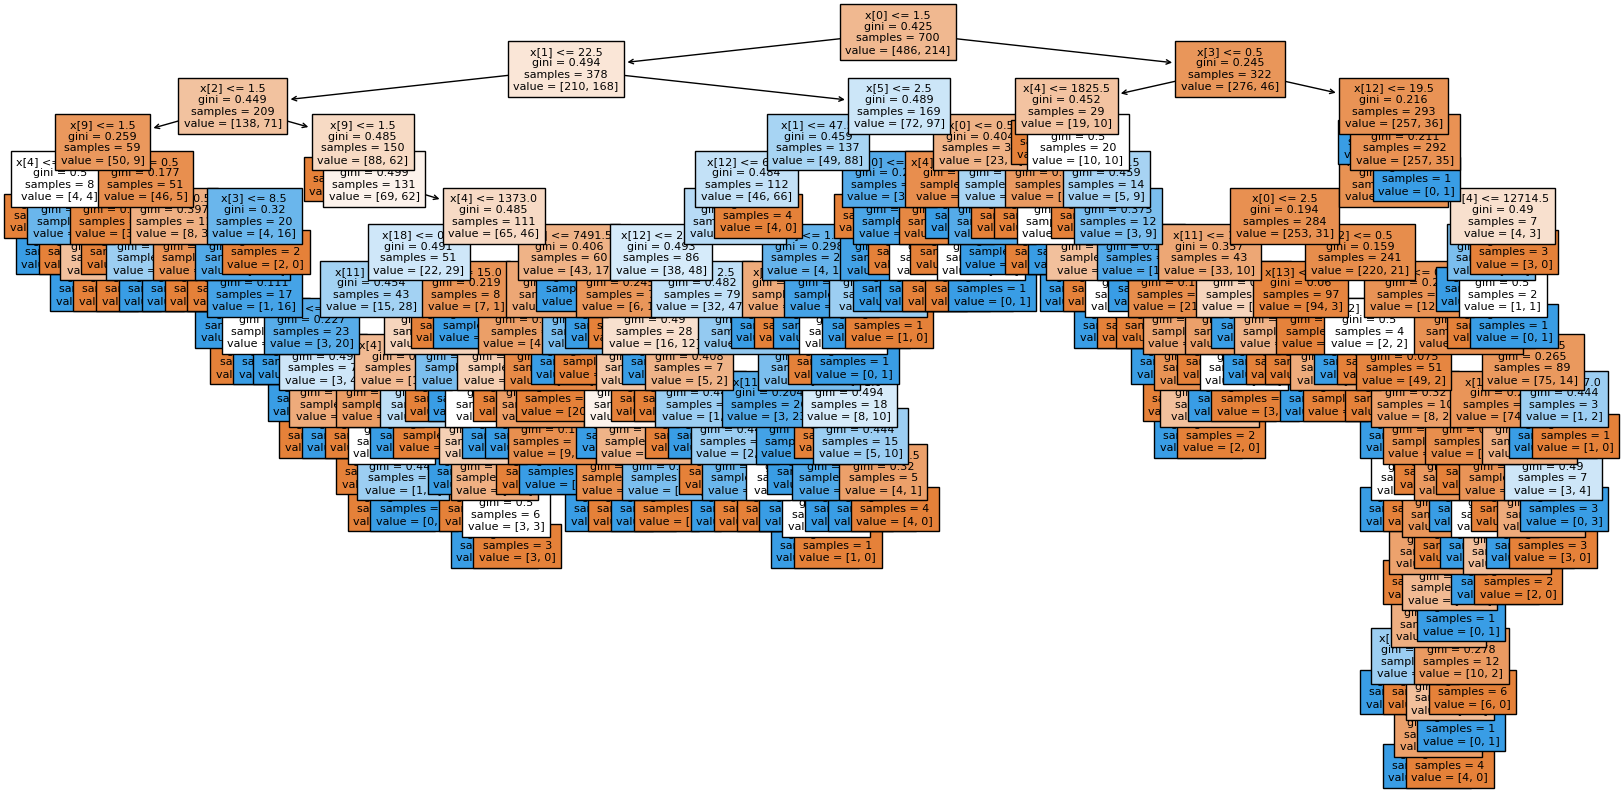

In [72]:
# 画Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plot_tree(credit_model_cart, filled=True, fontsize=8)

[Text(0.5432291666666667, 0.9722222222222222, 'x[0] <= 1.5\nentropy = 0.888\nsamples = 700\nvalue = [486, 214]'),
 Text(0.3411458333333333, 0.9166666666666666, 'x[1] <= 22.5\nentropy = 0.991\nsamples = 378\nvalue = [210, 168]'),
 Text(0.128125, 0.8611111111111112, 'x[2] <= 1.5\nentropy = 0.925\nsamples = 209\nvalue = [138, 71]'),
 Text(0.04791666666666667, 0.8055555555555556, 'x[9] <= 1.5\nentropy = 0.616\nsamples = 59\nvalue = [50, 9]'),
 Text(0.025, 0.75, 'x[3] <= 4.0\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.016666666666666666, 0.6944444444444444, 'x[1] <= 11.0\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.008333333333333333, 0.6388888888888888, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.025, 0.6388888888888888, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.03333333333333333, 0.6944444444444444, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.07083333333333333, 0.75, 'x[2] <= 0.5\nentropy = 0.463\nsamples = 51\nvalue = [46, 5]'),
 

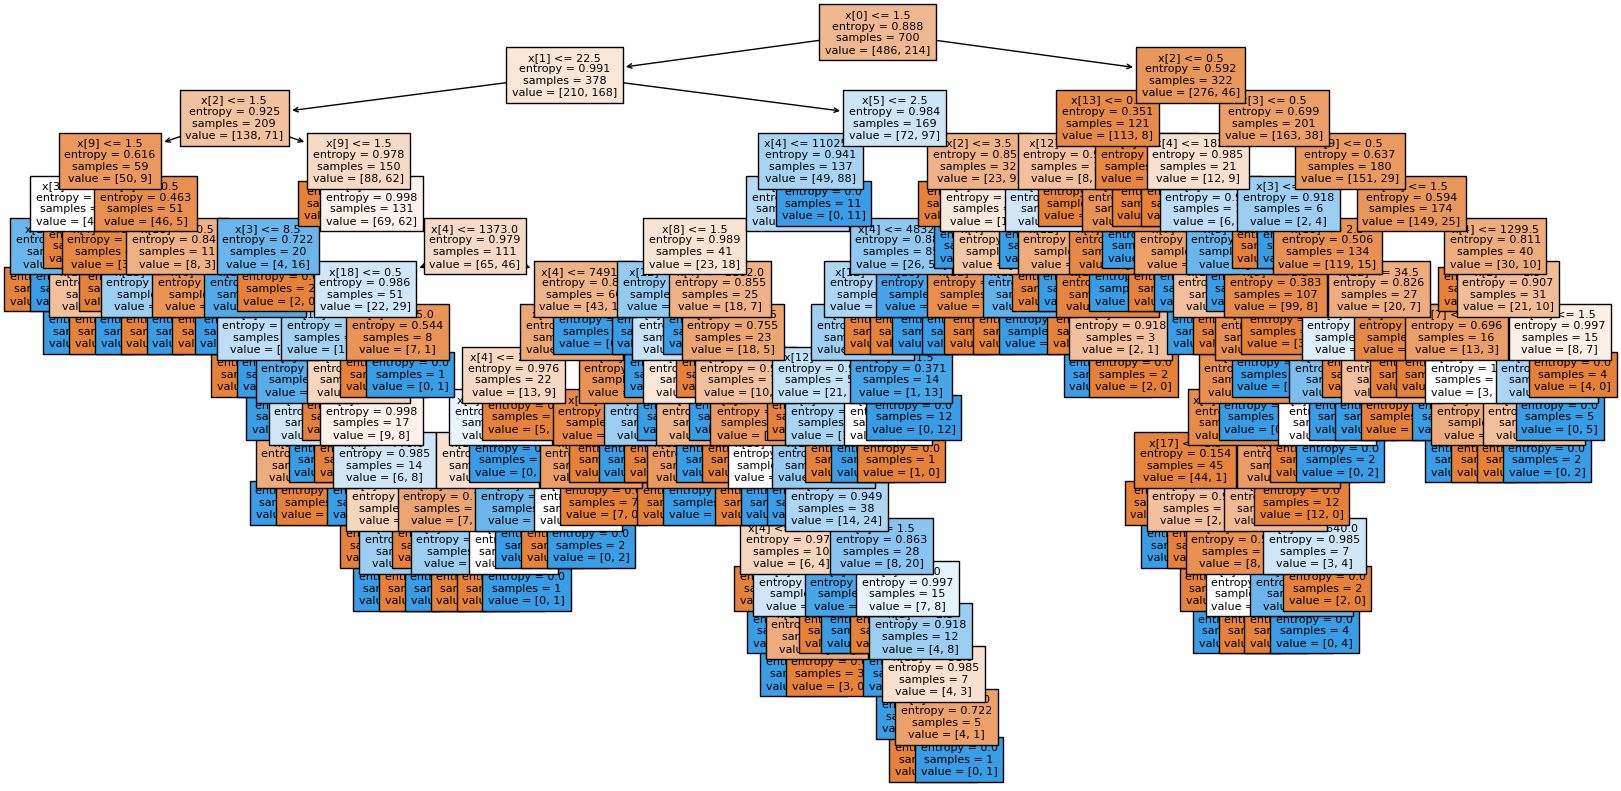

In [73]:
# 画Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plot_tree(credit_model_id3, filled=True, fontsize=8)

### Tree Pruning

[Text(0.5763888888888888, 0.9166666666666666, 'x[0] <= 1.5\ngini = 0.425\nsamples = 700\nvalue = [486, 214]'),
 Text(0.3611111111111111, 0.75, 'x[1] <= 22.5\ngini = 0.494\nsamples = 378\nvalue = [210, 168]'),
 Text(0.18055555555555555, 0.5833333333333334, 'x[2] <= 1.5\ngini = 0.449\nsamples = 209\nvalue = [138, 71]'),
 Text(0.1111111111111111, 0.4166666666666667, 'x[3] <= 4.5\ngini = 0.259\nsamples = 59\nvalue = [50, 9]'),
 Text(0.05555555555555555, 0.25, 'x[11] <= 0.5\ngini = 0.367\nsamples = 33\nvalue = [25, 8]'),
 Text(0.027777777777777776, 0.08333333333333333, 'gini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 Text(0.16666666666666666, 0.25, 'x[6] <= 2.5\ngini = 0.074\nsamples = 26\nvalue = [25, 1]'),
 Text(0.1388888888888889, 0.08333333333333333, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.19444444444444445, 0.08333333333333333, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text

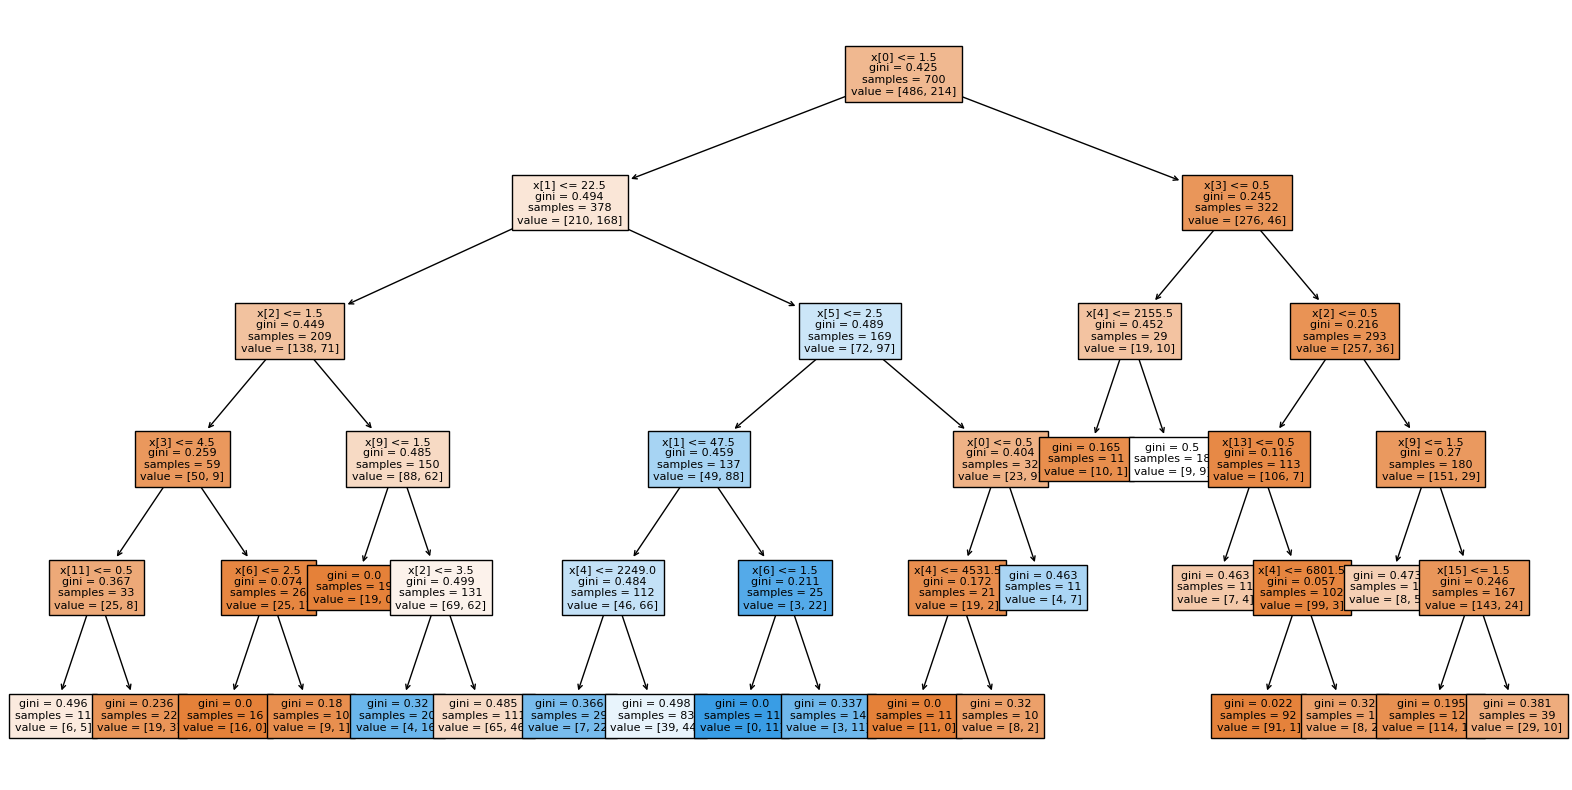

In [74]:
# 预剪枝
credit_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10)
credit_model.fit(train_x, train_y)
plt.figure(figsize=(20,10))
plot_tree(credit_model, filled=True, fontsize=8)

In [102]:
# 后剪枝
credit_model = DecisionTreeClassifier(criterion='gini')
path = credit_model.cost_complexity_pruning_path(train_x, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.00107143, 0.00119048, 0.00125   , 0.00125   ,
       0.00126984, 0.00126984, 0.00128571, 0.00134454, 0.00134921,
       0.00135714, 0.00135714, 0.0013587 , 0.00136646, 0.0014127 ,
       0.00142857, 0.00142857, 0.00147526, 0.00153061, 0.00162271,
       0.00164541, 0.00178187, 0.00181818, 0.00190476, 0.00190476,
       0.00190476, 0.00190476, 0.00190476, 0.00190476, 0.00198413,
       0.00209524, 0.00210112, 0.00214286, 0.00214286, 0.00214286,
       0.00214286, 0.0021645 , 0.00217687, 0.00221713, 0.0022551 ,
       0.00228571, 0.00228571, 0.0022987 , 0.00231546, 0.00238095,
       0.00239029, 0.00240497, 0.00244898, 0.00245578, 0.00247619,
       0.0025    , 0.00257143, 0.00265528, 0.0027381 , 0.00274286,
       0.0027551 , 0.00282993, 0.00313469, 0.00316653, 0.00331045,
       0.00344113, 0.00365624, 0.00375481, 0.00394703, 0.00406349,
       0.00407397, 0.00411565, 0.00477273, 0.00493517, 0.0060373 ,
       0.00603935, 0.00628912, 0.00641086, 0.00719872, 0.00942

In [103]:
model_trees = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(criterion='gini', ccp_alpha=ccp_alpha)
    model.fit(train_x, train_y)
    model_trees.append(model)
model_trees

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0010714285714285715),
 DecisionTreeClassifier(ccp_alpha=0.0011904761904761906),
 DecisionTreeClassifier(ccp_alpha=0.00125),
 DecisionTreeClassifier(ccp_alpha=0.00125),
 DecisionTreeClassifier(ccp_alpha=0.0012698412698412698),
 DecisionTreeClassifier(ccp_alpha=0.0012698412698412698),
 DecisionTreeClassifier(ccp_alpha=0.001285714285714286),
 DecisionTreeClassifier(ccp_alpha=0.0013445378151260507),
 DecisionTreeClassifier(ccp_alpha=0.0013492063492063495),
 DecisionTreeClassifier(ccp_alpha=0.0013571428571428567),
 DecisionTreeClassifier(ccp_alpha=0.0013571428571428567),
 DecisionTreeClassifier(ccp_alpha=0.0013586956521739124),
 DecisionTreeClassifier(ccp_alpha=0.001366459627329193),
 DecisionTreeClassifier(ccp_alpha=0.0014126984126984106),
 DecisionTreeClassifier(ccp_alpha=0.0014285714285714286),
 DecisionTreeClassifier(ccp_alpha=0.0014285714285714286),
 DecisionTreeClassifier(ccp_alpha=0.0014752567693744174),
 DecisionTreeClas

In [104]:
train_scores = [model.score(train_x, train_y) for model in model_trees]
test_scores = [model.score(test_x, test_y) for model in model_trees]

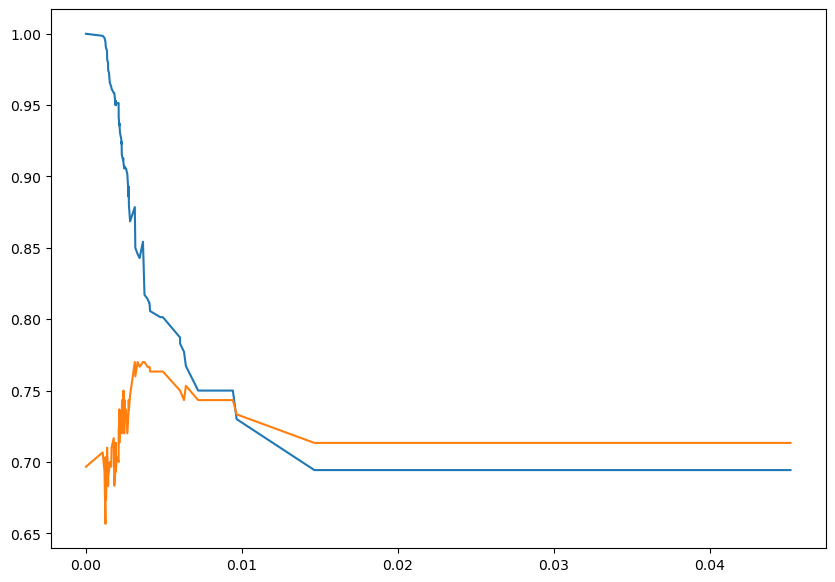

In [105]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
ax.set_label('alpha')
ax.plot(ccp_alphas, train_scores, label = 'train_x')
ax.plot(ccp_alphas, test_scores, label = 'test_x')


[Text(0.6666666666666666, 0.9, 'x[0] <= 1.5\nentropy = 0.888\nsamples = 700\nvalue = [486, 214]'),
 Text(0.5, 0.7, 'x[1] <= 22.5\nentropy = 0.991\nsamples = 378\nvalue = [210, 168]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 1.5\nentropy = 0.925\nsamples = 209\nvalue = [138, 71]'),
 Text(0.16666666666666666, 0.3, 'entropy = 0.616\nsamples = 59\nvalue = [50, 9]'),
 Text(0.5, 0.3, 'x[9] <= 1.5\nentropy = 0.978\nsamples = 150\nvalue = [88, 62]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.998\nsamples = 131\nvalue = [69, 62]'),
 Text(0.6666666666666666, 0.5, 'entropy = 0.984\nsamples = 169\nvalue = [72, 97]'),
 Text(0.8333333333333334, 0.7, 'entropy = 0.592\nsamples = 322\nvalue = [276, 46]')]

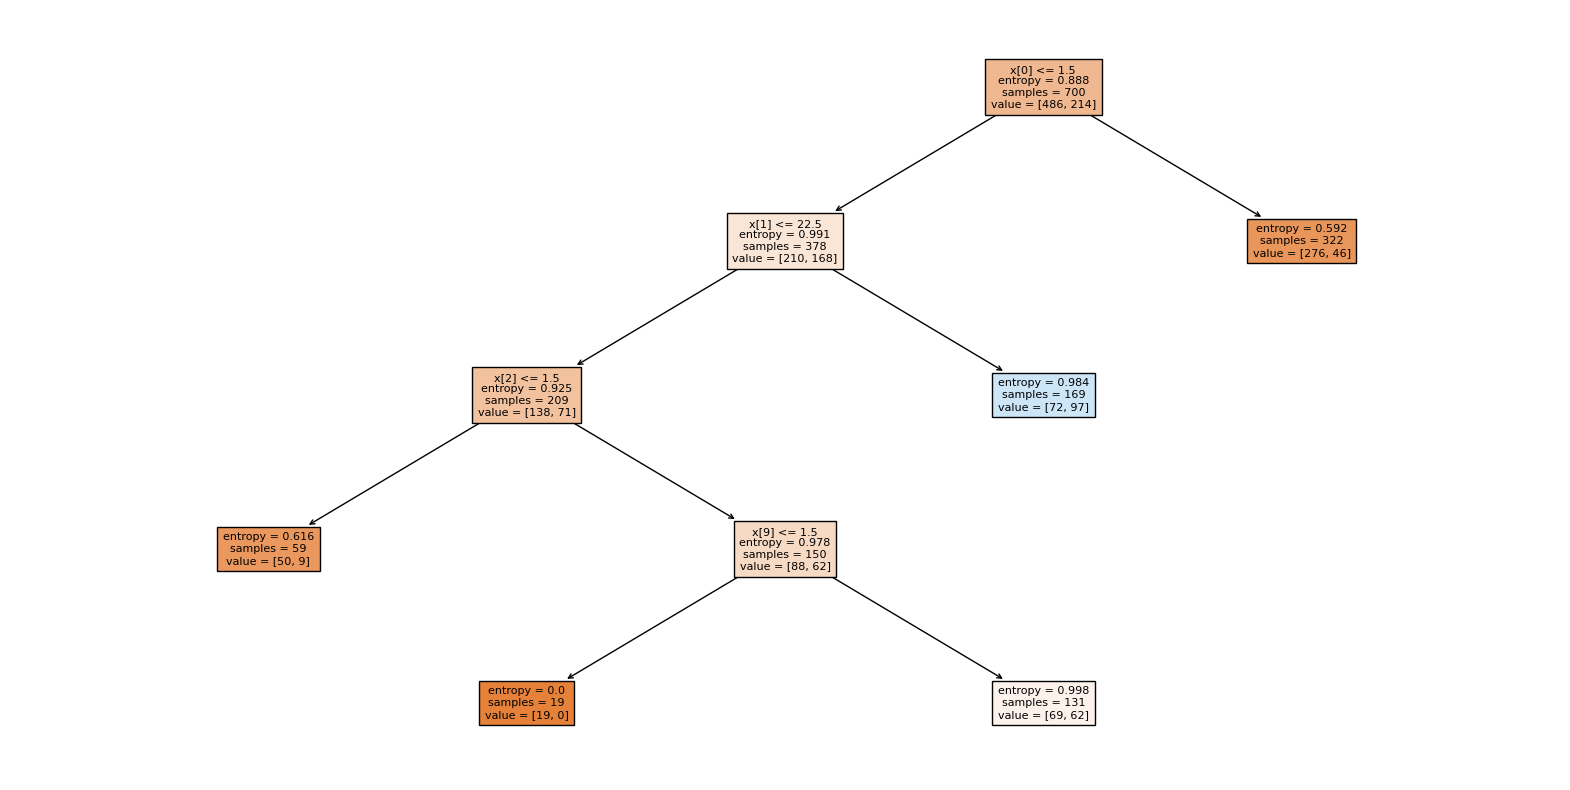

In [108]:
credit_model = DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.015)
credit_model.fit(train_x, train_y)
plt.figure(figsize=(20,10))
plot_tree(credit_model, filled=True, fontsize=8)